In [20]:
# Note in virtual enviornment to use the nem_bidding_dashboard library

from nem_bidding_dashboard import fetch_data
from nem_bidding_dashboard import fetch_and_preprocess
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
from nemosis import static_table, dynamic_data_compiler
import plotly.express as px
import nem_bidding_dashboard
import statsmodels.api as sm

raw_data_cache = '/Volumes/T7/NEMO_data'

pd.set_option('display.max_columns', None)

In [39]:
# Required to join DUIDs to firm names 
generator_info_df = static_table(table_name='Generators and Scheduled Loads', 
                              raw_data_location=raw_data_cache,
                              update_static_file=False)
generator_info_df

INFO: Retrieving static table Generators and Scheduled Loads


,Participant,Station Name,Region,Dispatch Type,Category,Classification,Fuel Source - Primary,Fuel Source - Descriptor,Technology Type - Primary,Technology Type - Descriptor,Aggregation,DUID
0,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Scheduled,Battery storage,Grid,Storage,Battery and Inverter,Y,ADPBA1G
1,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Load,Market,Scheduled,Battery storage,Grid,Storage,Battery and Inverter,Y,ADPBA1L
2,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Non-Scheduled,Hydro,Water,Renewable,Run of River,Y,ADPMH1
3,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Semi-Scheduled,Solar,Solar,Renewable,Photovoltaic Tracking Flat panel,Y,ADPPV1
4,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Non-Scheduled,Solar,Solar,Renewable,Photovoltaic Flat panel,Y,ADPPV2
...,...,...,...,...,...,...,...,...,...,...,...,...
527,Tailem Bend II Project Company Pty Ltd as trus...,Tailem Bend 2 Hybrid Renewable Power Station,SA1,Bidirectional Unit,Market,Scheduled,Battery storage,Grid,Storage,Battery and Inverter,Y,TB2B1
528,AGL Macquarie Pty Limited,Broken Hill Battery Energy Storage System,NSW1,Bidirectional Unit,Market,Scheduled,Battery storage,Grid,Storage,Battery and Inverter,Y,BHB1
529,AGL SA Generation Pty Limited,Torrens Island BESS,SA1,Bidirectional Unit,Market,Scheduled,Battery storage,Grid,Storage,Battery and Inverter,Y,TIB1
530,Capital Battery Pty Ltd as Trustee for Capital...,Capital Battery,NSW1,Load,Market,Scheduled,Battery storage,Grid,Storage,Battery and Inverter,Y,CAPBES1


In [45]:
# This is the table showing what electricity has been actually dispatched
# Used to find the inelastic demand in each region
dispatch_load_df = dynamic_data_compiler(start_time='2021/03/01 00:00:00',
                                   end_time='2021/04/10 00:00:00',
                                   table_name='DISPATCHLOAD',
                                   raw_data_location=raw_data_cache)
dispatch_load_df

INFO: Compiling data for table DISPATCHLOAD
INFO: Returning DISPATCHLOAD.


,SETTLEMENTDATE,DUID,INTERVENTION,DISPATCHMODE,AGCSTATUS,INITIALMW,TOTALCLEARED,RAMPDOWNRATE,RAMPUPRATE,LOWER5MIN,LOWER60SEC,LOWER6SEC,RAISE5MIN,RAISE60SEC,RAISE6SEC,LOWERREG,RAISEREG,AVAILABILITY,RAISEREGENABLEMENTMAX,RAISEREGENABLEMENTMIN,LOWERREGENABLEMENTMAX,LOWERREGENABLEMENTMIN,SEMIDISPATCHCAP
0,2021-03-01 00:05:00,AGLHAL,0,0,0,0.00000,0.00000,720.00,720.00,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0,0.0,175.00000,0.00,0.0,0.00,0.0,0
1,2021-03-01 00:05:00,AGLSOM,0,0,0,0.00000,0.00000,480.00,480.00,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0,0.0,160.00000,0.00,0.0,0.00,0.0,0
2,2021-03-01 00:05:00,ANGAST1,0,0,0,0.00000,0.00000,840.00,840.00,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0,0.0,40.00000,0.00,0.0,0.00,0.0,0
3,2021-03-01 00:05:00,APD01,0,0,0,0.00000,0.00000,0.00,0.00,0.0,0.0,0.00000,0.0001,0.0001,0.0001,0.0,0.0,0.00000,0.00,0.0,0.00,0.0,0
4,2021-03-01 00:05:00,ARWF1,0,0,0,162.50000,161.88836,600.00,1200.00,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0,0.0,161.88836,0.00,0.0,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914971,2021-04-10 00:00:00,YENDWF1,0,0,0,11.84000,11.49800,1680.00,1680.00,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0,0.0,11.49800,0.00,0.0,0.00,0.0,0
914972,2021-04-10 00:00:00,YWPS1,0,0,0,0.00000,0.00000,180.00,180.00,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0,0.0,0.00000,340.25,250.0,340.25,250.0,0
914973,2021-04-10 00:00:00,YWPS2,0,0,0,0.00000,0.00000,180.00,180.00,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0,0.0,0.00000,355.25,250.0,355.25,250.0,0
914974,2021-04-10 00:00:00,YWPS3,0,0,1,389.87469,390.00000,180.00,180.00,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0,0.0,390.00000,385.00,250.0,385.00,250.0,0


In [46]:
# We will now merge the dispatch table with info from the Generator table
# Perform an outer join to ensure we keep all DUIDs and settlement dates
merged_dispatch_with_units_df = pd.merge(dispatch_load_df[['SETTLEMENTDATE', 'DUID']], generator_info_df, on="DUID", how="outer")
    
# Now merge with the full dispatch_load dataset to bring all the fields together
working_dispatch_df = pd.merge(merged_dispatch_with_units_df,dispatch_load_df, on=["DUID", "SETTLEMENTDATE"], how="outer")

In [47]:
# Filters
working_dispatch_df_filtered = working_dispatch_df[working_dispatch_df['TOTALCLEARED'].notna() & (working_dispatch_df['TOTALCLEARED'] != 0.0)]

# We now filter again just for the dispatch loads of Origin Energy electricity plants for the 6:00-6:05pm auction
dispatch_df_time = working_dispatch_df_filtered[
    working_dispatch_df_filtered["SETTLEMENTDATE"].astype(str).str.contains("18:05:00", na=False)
]

date = '2021-04-07'

# Filter for a single day
# Next step: create a for loop to go through each of the dates
dispatch_df_time_date = dispatch_df_time[dispatch_df_time['SETTLEMENTDATE'].astype(str).str.contains(date)]

In [48]:
dispatch_df_time_date 

,SETTLEMENTDATE,DUID,Participant,Station Name,Region,Dispatch Type,Category,Classification,Fuel Source - Primary,Fuel Source - Descriptor,Technology Type - Primary,Technology Type - Descriptor,Aggregation,INTERVENTION,DISPATCHMODE,AGCSTATUS,INITIALMW,TOTALCLEARED,RAMPDOWNRATE,RAMPUPRATE,LOWER5MIN,LOWER60SEC,LOWER6SEC,RAISE5MIN,RAISE60SEC,RAISE6SEC,LOWERREG,RAISEREG,AVAILABILITY,RAISEREGENABLEMENTMAX,RAISEREGENABLEMENTMIN,LOWERREGENABLEMENTMAX,LOWERREGENABLEMENTMIN,SEMIDISPATCHCAP
10872,2021-04-07 18:05:00,AGLHAL,EnergyAustralia Yallourn Pty Ltd,Hallett Power Station,SA1,Generating Unit,Market,Scheduled,Fossil,Natural Gas / Diesel,Combustion,Open Cycle Gas turbines (OCGT),Y,0.0,4.0,0.0,29.85473,30.00000,720.0,720.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,156.00000,0.0,0.0,0.0,0.0,0.0
56952,2021-04-07 18:05:00,ARWF1,Ararat Wind Farm Pty Ltd,Ararat Wind Farm,VIC1,Generating Unit,Market,Semi-Scheduled,Wind,Wind,Renewable,Wind - Onshore,Y,0.0,0.0,0.0,16.40000,17.63749,600.0,1200.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,17.63749,0.0,0.0,0.0,0.0,0.0
149112,2021-04-07 18:05:00,BALBG1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,6.54000,13.95374,6000.0,6000.0,0.0,0.0,0.00000,16.04626,16.04626,16.04626,0.0,0.0,30.00000,30.0,0.0,30.0,0.0,0.0
172152,2021-04-07 18:05:00,BALDHWF1,Alinta Energy Retail Sales Pty Ltd,Bald Hills Wind Farm,VIC1,Generating Unit,Market,Semi-Scheduled,Wind,Wind,Renewable,Wind - Onshore,Y,0.0,0.0,0.0,15.59700,15.98200,540.0,1800.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,15.98200,0.0,0.0,0.0,0.0,0.0
195192,2021-04-07 18:05:00,BANN1,Alinta Energy Retail Sales Pty Ltd,Bannerton Solar Park,VIC1,Generating Unit,Market,Semi-Scheduled,Solar,Solar,Renewable,Photovoltaic Tracking Flat panel,Y,0.0,0.0,0.0,1.28000,0.01100,1080.0,1080.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.01100,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994200,2021-04-07 18:05:00,YARWUN_1,RTA Yarwun Pty Ltd,Yarwun Power Station,QLD1,Generating Unit,Market,Non-Scheduled**,Fossil,Natural Gas,Combustion,Combined Cycle Gas Turbine (CCGT),Y,0.0,0.0,0.0,162.48000,162.48000,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,165.00000,0.0,0.0,0.0,0.0,0.0
4005720,2021-04-07 18:05:00,YATSF1,Yatpool Sun Farm Pty Ltd,Yatpool Solar Farm,VIC1,Generating Unit,Market,Semi-Scheduled,Solar,Solar,Renewable,Photovoltaic Tracking Flat panel,Y,0.0,0.0,0.0,1.00000,0.01000,960.0,960.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.01000,0.0,0.0,0.0,0.0,0.0
4017240,2021-04-07 18:05:00,YENDWF1,Lal Lal Wind Farms Nom Co Pty Ltd,Yendon Wind Farm,VIC1,Generating Unit,Market,Semi-Scheduled,Wind,Wind,Renewable,Wind - Onshore,Y,0.0,0.0,0.0,3.96000,4.05100,1680.0,1680.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,4.05100,0.0,0.0,0.0,0.0,0.0
4051800,2021-04-07 18:05:00,YWPS3,EnergyAustralia Yallourn Pty Ltd,Yallourn 'W' Power Station,VIC1,Generating Unit,Market,Scheduled,Fossil,Brown Coal,Combustion,Steam Sub-Critical,Y,0.0,0.0,1.0,389.59241,390.00000,180.0,180.0,0.0,0.0,0.00000,0.00000,5.00000,15.00000,0.0,0.0,390.00000,385.0,250.0,385.0,250.0,0.0


In [49]:
total_inelastic_demand = dispatch_df_time_date['TOTALCLEARED'].sum()
inelastic_demand

25000

In [85]:
inelastic_demand_per_region = dispatch_df_time_date.groupby("Region")["TOTALCLEARED"].sum()
inelastic_demand_per_region_df = inelastic_demand_per_region.reset_index()
inelastic_demand_per_region_df = inelastic_demand_per_region_df[['Region', 'TOTALCLEARED']]
inelastic_demand_per_region_df

,Region,TOTALCLEARED
0,NSW1,7434.06825
1,QLD1,7755.88666
2,SA1,1303.24510
3,TAS1,1737.41067
4,VIC1,6034.24449


## Using Regional Dispatch Summary (DISPATCHREGIONSUM) for regional demand

In [90]:
regional_demand_df = dynamic_data_compiler(start_time='2021/03/01 00:00:00',
                                   end_time='2021/04/10 00:00:00',
                                   table_name='DISPATCHREGIONSUM',
                                   raw_data_location=raw_data_cache)
regional_demand_df 

INFO: Compiling data for table DISPATCHREGIONSUM
INFO: Downloading data for table DISPATCHREGIONSUM, year 2021, month 04
INFO: Creating feather file for DISPATCHREGIONSUM, 2021, 04
INFO: Returning DISPATCHREGIONSUM.


,SETTLEMENTDATE,REGIONID,DISPATCHINTERVAL,INTERVENTION,TOTALDEMAND,AVAILABLEGENERATION,AVAILABLELOAD,DEMANDFORECAST,DISPATCHABLEGENERATION,DISPATCHABLELOAD,NETINTERCHANGE,EXCESSGENERATION,LOWER5MINLOCALDISPATCH,LOWER60SECLOCALDISPATCH,LOWER6SECLOCALDISPATCH,RAISE5MINLOCALDISPATCH,RAISE60SECLOCALDISPATCH,RAISE6SECLOCALDISPATCH,INITIALSUPPLY,CLEAREDSUPPLY,LOWERREGLOCALDISPATCH,RAISEREGLOCALDISPATCH,TOTALINTERMITTENTGENERATION,DEMAND_AND_NONSCHEDGEN,UIGF,SEMISCHEDULE_CLEAREDMW,SEMISCHEDULE_COMPLIANCEMW
0,2021-03-02 07:35:00,NSW1,20210302043,0,8042.03,13071.75291,0,19.13281,7578.69,0.0,-463.34,0,0.00,113.00,63.68,144.00,226.60,218.60,8035.62109,8065.21,81.87,59.00,36.32814,8101.53814,1346.75291,1324.12799,1026.61879
1,2021-03-02 07:35:00,QLD1,20210302043,0,6780.26,10164.45934,0,33.36133,6594.27,0.0,-185.99,0,0.00,5.00,5.00,90.01,98.00,64.00,6714.54004,6786.10,65.26,68.00,88.69325,6874.79325,479.45934,479.45934,0.00000
2,2021-03-02 07:35:00,SA1,20210302043,0,1347.27,2616.66779,106,-22.33775,1337.96,0.0,-9.31,0,61.00,63.00,89.00,106.00,73.00,117.00,1355.49414,1347.63,55.00,24.63,169.27080,1516.90080,1093.66779,1039.95527,84.33498
3,2021-03-02 07:35:00,TAS1,20210302043,0,1129.98,1783.59400,0,-6.16187,962.36,0.0,-167.62,0,0.00,0.00,0.00,34.37,138.23,110.58,1127.08215,1129.98,0.00,50.00,128.20072,1258.18072,226.59400,226.59400,38.86700
4,2021-03-02 07:35:00,VIC1,20210302043,0,5272.85,8984.64912,0,-2.37646,6139.33,0.0,866.48,0,28.13,126.99,110.00,76.00,82.00,80.00,5281.07959,5283.69,115.00,18.37,213.28701,5496.97701,1131.64912,1083.33012,555.08533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,2021-04-10 00:00:00,NSW1,20210409240,0,7279.51,9138.03840,0,-77.09521,6579.70,0.0,-699.81,0,65.00,116.00,60.00,82.00,122.00,151.00,7373.94385,7284.39,29.00,21.00,26.42478,7310.81478,353.03840,353.03840,0.00000
12956,2021-04-10 00:00:00,QLD1,20210409240,0,5919.47,8994.84500,0,-34.08057,6338.28,0.0,418.81,0,1.00,1.00,1.00,107.89,103.00,139.53,5979.52002,5924.25,40.00,67.00,73.64000,5997.89000,51.84500,51.84500,0.00000
12957,2021-04-10 00:00:00,SA1,20210409240,0,1301.73,2820.10520,115,-16.50814,1224.33,0.0,-77.39,0,98.00,100.00,165.00,118.00,148.53,198.00,1321.50159,1301.52,92.00,100.00,148.12085,1449.64085,658.10520,658.10520,0.00000
12958,2021-04-10 00:00:00,TAS1,20210409240,0,988.10,2399.18200,0,-2.62012,1453.03,0.0,464.93,0,25.26,79.73,12.57,0.00,17.75,17.75,1016.93103,1007.03,49.00,32.00,170.20929,1177.23929,256.18200,256.18200,0.00000


In [91]:
# We now filter again just for the dispatch loads of Origin Energy electricity plants for the 6:00-6:05pm auction
regional_demand_time_df = regional_demand_df[
    regional_demand_df["SETTLEMENTDATE"].astype(str).str.contains("18:05:00", na=False)
]

date = '2021-04-07'

# Filter for a single day
# Next step: create a for loop to go through each of the dates
regional_demand_time_date_df = regional_demand_time_df[regional_demand_time_df['SETTLEMENTDATE'].astype(str).str.contains(date)]
regional_demand_time_date_df

,SETTLEMENTDATE,REGIONID,DISPATCHINTERVAL,INTERVENTION,TOTALDEMAND,AVAILABLEGENERATION,AVAILABLELOAD,DEMANDFORECAST,DISPATCHABLEGENERATION,DISPATCHABLELOAD,NETINTERCHANGE,EXCESSGENERATION,LOWER5MINLOCALDISPATCH,LOWER60SECLOCALDISPATCH,LOWER6SECLOCALDISPATCH,RAISE5MINLOCALDISPATCH,RAISE60SECLOCALDISPATCH,RAISE6SECLOCALDISPATCH,INITIALSUPPLY,CLEAREDSUPPLY,LOWERREGLOCALDISPATCH,RAISEREGLOCALDISPATCH,TOTALINTERMITTENTGENERATION,DEMAND_AND_NONSCHEDGEN,UIGF,SEMISCHEDULE_CLEAREDMW,SEMISCHEDULE_COMPLIANCEMW
9720,2021-04-07 18:05:00,NSW1,20210407169,0,9151.53,11094.83800,0,0.58398,8654.07,0.0,-497.46,0,64.00,113.78,51.00,74.81,91.79,123.88,9119.06836,9149.66,34.0,30.0,36.27299,9185.93299,461.83800,461.83800,0.00000
9721,2021-04-07 18:05:00,QLD1,20210407169,0,7588.19,9904.46081,0,-17.29004,7755.89,0.0,167.70,0,16.00,16.00,16.00,112.00,125.38,124.96,7597.27930,7587.09,35.0,119.0,77.40125,7664.49125,51.46081,21.70981,21.70881
9722,2021-04-07 18:05:00,SA1,20210407169,0,1661.82,2045.24510,112,18.94164,1384.25,0.0,-277.58,0,86.00,90.00,153.00,118.00,123.67,186.00,1650.35388,1663.78,42.0,15.0,3.78662,1667.56662,109.24510,109.24510,0.00000
9723,2021-04-07 18:05:00,TAS1,20210407169,0,1272.48,2140.99100,0,1.47968,1737.41,0.0,464.93,0,10.58,40.00,2.41,0.00,15.97,15.97,1283.13135,1291.41,39.0,32.0,52.54763,1343.95763,10.99100,10.99100,0.00000
9724,2021-04-07 18:05:00,VIC1,20210407169,0,5876.14,7658.45249,0,2.33105,6058.20,0.0,182.05,0,65.00,92.00,40.18,158.05,225.05,131.05,5863.17822,5897.87,60.0,24.0,17.24700,5915.11700,145.45249,145.24449,0.00100


In [6]:
bids = fetch_and_preprocess.bid_data(
    start_time='2021/04/07 18:00:00',
    end_time='2021/04/07 18:05:00',
    raw_data_cache=raw_data_cache)

INFO: Compiling data for table BIDPEROFFER_D
INFO: Returning BIDPEROFFER_D.
INFO: Compiling data for table BIDDAYOFFER_D
INFO: Returning BIDDAYOFFER_D.
INFO: Compiling data for table DISPATCHLOAD
INFO: Returning DISPATCHLOAD.


In [7]:
bids

,INTERVAL_DATETIME,DUID,BIDBAND,BIDVOLUME,BIDVOLUMEADJUSTED,BIDPRICE,ONHOUR
0,2021-04-07 18:05:00,AGLHAL,1,30,30.000,-966.60,False
382,2021-04-07 18:05:00,OAKEY2,8,173,161.000,14379.79,False
383,2021-04-07 18:05:00,OAKEY2SF,1,1,0.000,-959.72,False
384,2021-04-07 18:05:00,OAKEY2SF,2,54,0.000,-75.00,False
385,2021-04-07 18:05:00,OAKLAND1,1,63,0.001,-898.95,False
...,...,...,...,...,...,...,...
194,2021-04-07 18:05:00,GSTONE5,2,20,0.000,0.68,False
195,2021-04-07 18:05:00,GSTONE5,3,45,0.000,33.18,False
196,2021-04-07 18:05:00,GSTONE5,4,25,0.000,42.46,False
144,2021-04-07 18:05:00,ER01,1,210,0.000,-983.50,False


In [62]:
# We will now merge the dispatch table with info from the Generator table
# Perform an outer join to ensure we keep all DUIDs and settlement dates
bids_and_generators = pd.merge(bids, generator_info_df, on="DUID", how="inner")

In [63]:
bids_and_generators 

,INTERVAL_DATETIME,DUID,BIDBAND,BIDVOLUME,BIDVOLUMEADJUSTED,BIDPRICE,ONHOUR,Participant,Station Name,Region,Dispatch Type,Category,Classification,Fuel Source - Primary,Fuel Source - Descriptor,Technology Type - Primary,Technology Type - Descriptor,Aggregation
0,2021-04-07 18:05:00,AGLHAL,1,30,30.0,-966.60,False,EnergyAustralia Yallourn Pty Ltd,Hallett Power Station,SA1,Generating Unit,Market,Scheduled,Fossil,Natural Gas / Diesel,Combustion,Open Cycle Gas turbines (OCGT),Y
1,2021-04-07 18:05:00,AGLHAL,10,225,126.0,14499.00,False,EnergyAustralia Yallourn Pty Ltd,Hallett Power Station,SA1,Generating Unit,Market,Scheduled,Fossil,Natural Gas / Diesel,Combustion,Open Cycle Gas turbines (OCGT),Y
2,2021-04-07 18:05:00,OAKEY2,8,173,161.0,14379.79,False,Shell Energy Retail Pty Ltd,Oakey Power Station,QLD1,Generating Unit,Market,Scheduled,Fossil,Natural Gas,Combustion,Open Cycle Gas turbines (OCGT),Y
3,2021-04-07 18:05:00,OAKEY2SF,1,1,0.0,-959.72,False,Diamond Energy Pty Ltd,Oakey 2 Solar Farm,QLD1,Generating Unit,Market,Semi-Scheduled,Solar,Solar,Renewable,Photovoltaic Tracking Flat panel,Y
4,2021-04-07 18:05:00,OAKEY2SF,2,54,0.0,-75.00,False,Diamond Energy Pty Ltd,Oakey 2 Solar Farm,QLD1,Generating Unit,Market,Semi-Scheduled,Solar,Solar,Renewable,Photovoltaic Tracking Flat panel,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,2021-04-07 18:05:00,GSTONE3,10,115,110.0,13932.00,False,CS Energy Limited,Gladstone Power Station,QLD1,Generating Unit,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,Y
505,2021-04-07 18:05:00,GSTONE4,1,110,110.0,-928.80,False,CS Energy Limited,Gladstone Power Station,QLD1,Generating Unit,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,Y
506,2021-04-07 18:05:00,GSTONE4,2,30,30.0,0.68,False,CS Energy Limited,Gladstone Power Station,QLD1,Generating Unit,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,Y
507,2021-04-07 18:05:00,GSTONE4,3,30,30.0,33.19,False,CS Energy Limited,Gladstone Power Station,QLD1,Generating Unit,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,Y


In [66]:
bids_and_generators.isna().sum()

INTERVAL_DATETIME               0
DUID                            0
BIDBAND                         0
BIDVOLUME                       0
BIDVOLUMEADJUSTED               0
BIDPRICE                        0
ONHOUR                          0
Participant                     0
Station Name                    0
Region                          0
Dispatch Type                   0
Category                        0
Classification                  0
Fuel Source - Primary           0
Fuel Source - Descriptor        0
Technology Type - Primary       0
Technology Type - Descriptor    0
Aggregation                     0
dtype: int64

In [68]:
bids_sorted_by_region = (
    bids_and_generators.groupby("Region")  # Group by region
    .apply(lambda x: x.sort_values("BIDPRICE", ascending=True))  # Sort bids within each region
    .reset_index(drop=True)  # Reset index to keep clean output
)

In [70]:
bids_sorted_by_region

,INTERVAL_DATETIME,DUID,BIDBAND,BIDVOLUME,BIDVOLUMEADJUSTED,BIDPRICE,ONHOUR,Participant,Station Name,Region,Dispatch Type,Category,Classification,Fuel Source - Primary,Fuel Source - Descriptor,Technology Type - Primary,Technology Type - Descriptor,Aggregation
0,2021-04-07 18:05:00,TARALGA1,1,106,9.493,-1001.51,False,Taralga Wind Farm Nominees No 2 Pty Ltd (ATF T...,Taralga Wind Farm,NSW1,Generating Unit,Market,Semi-Scheduled,Wind,Wind,Renewable,Wind - Onshore,N
1,2021-04-07 18:05:00,SNOWYP,1,600,0.000,-994.20,False,Snowy Hydro Limited,Tumut 3 Pumps,NSW1,Load,Market,Scheduled*,Hydro,Water,Renewable,Hydro - Gravity,Y
2,2021-04-07 18:05:00,TALWA1,1,190,0.000,-991.80,False,EnergyAustralia Pty Ltd,Tallawarra Power Station,NSW1,Generating Unit,Market,Scheduled,Fossil,Natural Gas,Combustion,Combined Cycle Gas Turbine (CCGT),Y
3,2021-04-07 18:05:00,VP6,1,250,250.000,-985.70,False,Delta Electricity,"Vales Point ""B"" Power Station",NSW1,Generating Unit,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,Y
4,2021-04-07 18:05:00,VP5,1,250,250.000,-985.70,False,Delta Electricity,"Vales Point ""B"" Power Station",NSW1,Generating Unit,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,2021-04-07 18:05:00,MORTLK11,10,292,271.000,14767.50,False,Origin Energy Electricity Limited,Mortlake Power Station,VIC1,Generating Unit,Market,Scheduled,Fossil,Natural Gas,Combustion,Open Cycle Gas turbines (OCGT),Y
505,2021-04-07 18:05:00,LNGS1,10,172,168.000,14864.93,False,Snowy Hydro Limited,Laverton North Power Station,VIC1,Generating Unit,Market,Scheduled,Fossil,Natural Gas,Combustion,Open Cycle Gas turbines (OCGT),Y
506,2021-04-07 18:05:00,LNGS2,10,172,168.000,14864.94,False,Snowy Hydro Limited,Laverton North Power Station,VIC1,Generating Unit,Market,Scheduled,Fossil,Natural Gas,Combustion,Open Cycle Gas turbines (OCGT),Y
507,2021-04-07 18:05:00,WKIEWA2,10,34,33.000,15036.00,False,AGL Hydro Partnership,West Kiewa Power Station,VIC1,Generating Unit,Market,Scheduled,Hydro,Water,Renewable,Hydro - Gravity,Y


In [75]:
# Calculate cumulative sum of BIDVOLUMEADJUSTED for each settlement interval
bids_sorted_by_region['cum_bidvolumeadjusted_for_each_region'] = (
    bids_sorted_by_region.groupby(['INTERVAL_DATETIME', 'Region'])['BIDVOLUMEADJUSTED'].cumsum()
)

In [76]:
bids_sorted_by_region

,INTERVAL_DATETIME,DUID,BIDBAND,BIDVOLUME,BIDVOLUMEADJUSTED,BIDPRICE,ONHOUR,Participant,Station Name,Region,Dispatch Type,Category,Classification,Fuel Source - Primary,Fuel Source - Descriptor,Technology Type - Primary,Technology Type - Descriptor,Aggregation,cum_bidvolumeadjusted_for_each_region
0,2021-04-07 18:05:00,TARALGA1,1,106,9.493,-1001.51,False,Taralga Wind Farm Nominees No 2 Pty Ltd (ATF T...,Taralga Wind Farm,NSW1,Generating Unit,Market,Semi-Scheduled,Wind,Wind,Renewable,Wind - Onshore,N,9.49300
1,2021-04-07 18:05:00,SNOWYP,1,600,0.000,-994.20,False,Snowy Hydro Limited,Tumut 3 Pumps,NSW1,Load,Market,Scheduled*,Hydro,Water,Renewable,Hydro - Gravity,Y,9.49300
2,2021-04-07 18:05:00,TALWA1,1,190,0.000,-991.80,False,EnergyAustralia Pty Ltd,Tallawarra Power Station,NSW1,Generating Unit,Market,Scheduled,Fossil,Natural Gas,Combustion,Combined Cycle Gas Turbine (CCGT),Y,9.49300
3,2021-04-07 18:05:00,VP6,1,250,250.000,-985.70,False,Delta Electricity,"Vales Point ""B"" Power Station",NSW1,Generating Unit,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,Y,259.49300
4,2021-04-07 18:05:00,VP5,1,250,250.000,-985.70,False,Delta Electricity,"Vales Point ""B"" Power Station",NSW1,Generating Unit,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,Y,509.49300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,2021-04-07 18:05:00,MORTLK11,10,292,271.000,14767.50,False,Origin Energy Electricity Limited,Mortlake Power Station,VIC1,Generating Unit,Market,Scheduled,Fossil,Natural Gas,Combustion,Open Cycle Gas turbines (OCGT),Y,7233.45249
505,2021-04-07 18:05:00,LNGS1,10,172,168.000,14864.93,False,Snowy Hydro Limited,Laverton North Power Station,VIC1,Generating Unit,Market,Scheduled,Fossil,Natural Gas,Combustion,Open Cycle Gas turbines (OCGT),Y,7401.45249
506,2021-04-07 18:05:00,LNGS2,10,172,168.000,14864.94,False,Snowy Hydro Limited,Laverton North Power Station,VIC1,Generating Unit,Market,Scheduled,Fossil,Natural Gas,Combustion,Open Cycle Gas turbines (OCGT),Y,7569.45249
507,2021-04-07 18:05:00,WKIEWA2,10,34,33.000,15036.00,False,AGL Hydro Partnership,West Kiewa Power Station,VIC1,Generating Unit,Market,Scheduled,Hydro,Water,Renewable,Hydro - Gravity,Y,7602.45249


In [92]:
# Create the demand_function column as the inelastic demand minus the cumulative bid volume adjusted

# Map inelastic demand per region from TOTALCLEARED
inelastic_demand_dict = dict(zip(regional_demand_time_date_df["REGIONID"], regional_demand_time_date_df["TOTALDEMAND"]))

# Compute demand function for each region
bids_sorted_by_region["demand_function_for_each_region"] = (
    bids_sorted_by_region["Region"].map(inelastic_demand_dict) - bids_sorted_by_region["cum_bidvolumeadjusted_for_each_region"]
)

bids_sorted_by_region

,INTERVAL_DATETIME,DUID,BIDBAND,BIDVOLUME,BIDVOLUMEADJUSTED,BIDPRICE,ONHOUR,Participant,Station Name,Region,Dispatch Type,Category,Classification,Fuel Source - Primary,Fuel Source - Descriptor,Technology Type - Primary,Technology Type - Descriptor,Aggregation,cum_bidvolumeadjusted_for_each_region,demand_function_for_each_region
0,2021-04-07 18:05:00,TARALGA1,1,106,9.493,-1001.51,False,Taralga Wind Farm Nominees No 2 Pty Ltd (ATF T...,Taralga Wind Farm,NSW1,Generating Unit,Market,Semi-Scheduled,Wind,Wind,Renewable,Wind - Onshore,N,9.49300,9142.03700
1,2021-04-07 18:05:00,SNOWYP,1,600,0.000,-994.20,False,Snowy Hydro Limited,Tumut 3 Pumps,NSW1,Load,Market,Scheduled*,Hydro,Water,Renewable,Hydro - Gravity,Y,9.49300,9142.03700
2,2021-04-07 18:05:00,TALWA1,1,190,0.000,-991.80,False,EnergyAustralia Pty Ltd,Tallawarra Power Station,NSW1,Generating Unit,Market,Scheduled,Fossil,Natural Gas,Combustion,Combined Cycle Gas Turbine (CCGT),Y,9.49300,9142.03700
3,2021-04-07 18:05:00,VP6,1,250,250.000,-985.70,False,Delta Electricity,"Vales Point ""B"" Power Station",NSW1,Generating Unit,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,Y,259.49300,8892.03700
4,2021-04-07 18:05:00,VP5,1,250,250.000,-985.70,False,Delta Electricity,"Vales Point ""B"" Power Station",NSW1,Generating Unit,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,Y,509.49300,8642.03700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,2021-04-07 18:05:00,MORTLK11,10,292,271.000,14767.50,False,Origin Energy Electricity Limited,Mortlake Power Station,VIC1,Generating Unit,Market,Scheduled,Fossil,Natural Gas,Combustion,Open Cycle Gas turbines (OCGT),Y,7233.45249,-1357.31249
505,2021-04-07 18:05:00,LNGS1,10,172,168.000,14864.93,False,Snowy Hydro Limited,Laverton North Power Station,VIC1,Generating Unit,Market,Scheduled,Fossil,Natural Gas,Combustion,Open Cycle Gas turbines (OCGT),Y,7401.45249,-1525.31249
506,2021-04-07 18:05:00,LNGS2,10,172,168.000,14864.94,False,Snowy Hydro Limited,Laverton North Power Station,VIC1,Generating Unit,Market,Scheduled,Fossil,Natural Gas,Combustion,Open Cycle Gas turbines (OCGT),Y,7569.45249,-1693.31249
507,2021-04-07 18:05:00,WKIEWA2,10,34,33.000,15036.00,False,AGL Hydro Partnership,West Kiewa Power Station,VIC1,Generating Unit,Market,Scheduled,Hydro,Water,Renewable,Hydro - Gravity,Y,7602.45249,-1726.31249


In [94]:
# Create a dictionary to store market clearing prices for each region
market_clearing_prices = {}

# Iterate through each unique region
for region in bids_sorted_by_region["Region"].unique():
    try:
        # Find the first row where the demand function goes below zero for that region
        mc_row = bids_sorted_by_region[(bids_sorted_by_region["Region"] == region) & 
                             (bids_sorted_by_region["demand_function_for_each_region"] < 0)].iloc[0]
        
        # Store the market clearing price
        market_clearing_prices[region] = mc_row["BIDPRICE"]
    
    except IndexError:
        # If no row meets the condition, indicate it
        market_clearing_prices[region] = "Demand never turns negative"

# Print the results
for region, price in market_clearing_prices.items():
    print(f"Market Clearing Price for {region}: {price}")

Market Clearing Price for NSW1: 13868.54
Market Clearing Price for QLD1: 22.25
Market Clearing Price for SA1: 14499.0
Market Clearing Price for TAS1: 10.77
Market Clearing Price for VIC1: 20.23


This number of 61 makes sense. It means that if regional transmission constraints were taken into account, then this would match the 200s. 

## Test the 

## Plotting

INFO: Compiling data for table BIDPEROFFER_D
INFO: Returning BIDPEROFFER_D.
INFO: Compiling data for table BIDDAYOFFER_D
INFO: Returning BIDDAYOFFER_D.
INFO: Compiling data for table DISPATCHLOAD
INFO: Returning DISPATCHLOAD.


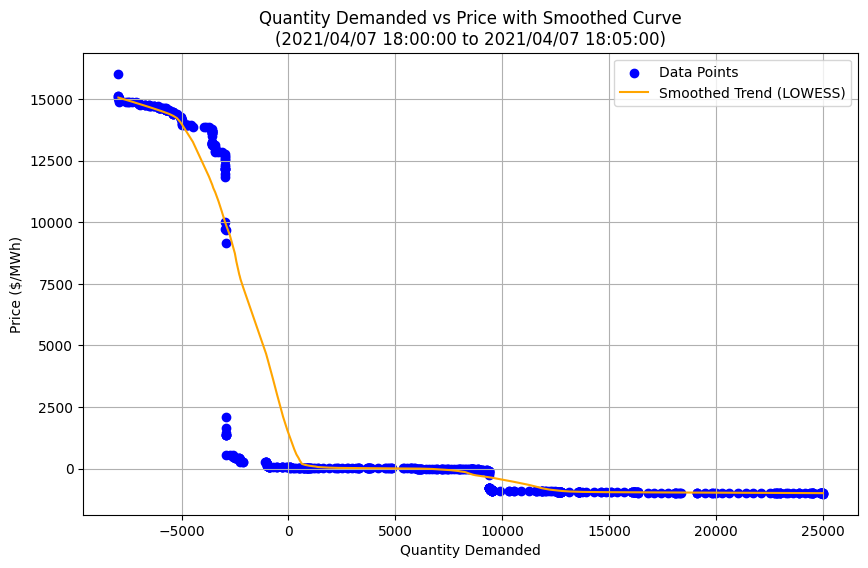

In [24]:
def plot_smoothed_demand_curve(raw_data_cache, start_time, end_time, inelastic_demand=25000, frac=0.3):
    """
    Fetch bid data between start_time and end_time from the given raw_data_cache,
    calculate cumulative bid volume and demand function, and plot the smoothed demand curve.
    
    Parameters:
        raw_data_cache (str): Path to the raw data cache.
        start_time (str): Start time in the format 'YYYY/MM/DD HH:MM:SS'.
        end_time (str): End time in the format 'YYYY/MM/DD HH:MM:SS'.
        inelastic_demand (float): The inelastic demand value.
        frac (float): The fraction of data used for LOWESS smoothing (default 0.3).
    """
    # Fetch bid data
    bids = fetch_and_preprocess.bid_data(
        start_time=start_time,
        end_time=end_time,
        raw_data_cache=raw_data_cache
    )
    
    # Sort bids by BIDPRICE
    bids_sorted = bids.sort_values(by="BIDPRICE", ascending=True)
    
    # Calculate cumulative sum of BIDVOLUMEADJUSTED for each settlement interval
    bids_sorted['cum_bidvolumeadjusted'] = bids_sorted.groupby('INTERVAL_DATETIME')['BIDVOLUMEADJUSTED'].cumsum()
    
    # Create the demand_function column as the inelastic demand minus the cumulative bid volume adjusted
    bids_sorted['demand_function'] = inelastic_demand - bids_sorted['cum_bidvolumeadjusted']
    
    # Compute LOWESS smoothing
    smoothed = sm.nonparametric.lowess(
        endog=bids_sorted['BIDPRICE'], 
        exog=bids_sorted['demand_function'], 
        frac=frac
    )
    
    # Plot original data points
    plt.figure(figsize=(10, 6))
    plt.scatter(bids_sorted['demand_function'], bids_sorted['BIDPRICE'], color='blue', label='Data Points')
    # Plot the smoothed curve
    plt.plot(smoothed[:, 0], smoothed[:, 1], color='orange', label='Smoothed Trend (LOWESS)')
    
    plt.xlabel('Quantity Demanded')
    plt.ylabel('Price ($/MWh)')
    plt.title(f'Quantity Demanded vs Price with Smoothed Curve\n({start_time} to {end_time})')
    plt.legend()
    plt.grid(True)

    
    plt.show()

# Example usage:
raw_data_cache = '/Volumes/T7/NEMO_data'
plot_smoothed_demand_curve(raw_data_cache, '2021/04/07 18:00:00', '2021/04/07 18:05:00')

## Plotting the price

In [95]:
# Get the price bids.
price_data = dynamic_data_compiler(start_time='2021/03/01 00:00:00',
                                   end_time='2024/04/10 00:00:00',
                                   table_name='DISPATCHPRICE',
                                   raw_data_location=raw_data_cache)

INFO: Compiling data for table DISPATCHPRICE
INFO: Downloading data for table DISPATCHPRICE, year 2024, month 02
INFO: Creating feather file for DISPATCHPRICE, 2024, 02
INFO: Downloading data for table DISPATCHPRICE, year 2024, month 03
INFO: Creating feather file for DISPATCHPRICE, 2024, 03
INFO: Downloading data for table DISPATCHPRICE, year 2024, month 04
INFO: Creating feather file for DISPATCHPRICE, 2024, 04
INFO: Returning DISPATCHPRICE.


In [96]:
price_data

,SETTLEMENTDATE,REGIONID,INTERVENTION,RRP,RAISE6SECRRP,RAISE60SECRRP,RAISE5MINRRP,RAISEREGRRP,LOWER6SECRRP,LOWER60SECRRP,LOWER5MINRRP,LOWERREGRRP,PRICE_STATUS
0,2021-03-01 00:05:00,NSW1,0,36.23968,1.73,3.04743,0.88,12.75,0.990,1.81,0.20,9.52011,FIRM
1,2021-03-01 00:05:00,QLD1,0,43.72986,1.73,3.04743,0.88,12.75,0.990,1.81,0.20,9.52011,FIRM
2,2021-03-01 00:05:00,SA1,0,72.31011,1.73,3.04743,0.88,12.75,0.990,0.00,0.00,9.32011,FIRM
3,2021-03-01 00:05:00,TAS1,0,27.63901,4.98,7.74543,0.90,12.77,0.990,0.44,0.20,9.52011,FIRM
4,2021-03-01 00:05:00,VIC1,0,20.95000,1.73,3.04743,0.88,12.75,0.990,1.81,0.20,9.52011,FIRM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,2024-04-10 00:00:00,NSW1,0,64.82204,0.71,0.39000,0.39,1.79,0.010,0.03,0.01,0.01000,FIRM
12956,2024-04-10 00:00:00,QLD1,0,63.81004,0.71,0.39000,0.39,1.79,0.010,0.03,0.01,0.01000,FIRM
12957,2024-04-10 00:00:00,SA1,0,99.98000,0.71,0.39000,0.39,1.79,0.010,0.03,0.01,0.01000,FIRM
12958,2024-04-10 00:00:00,TAS1,0,80.49367,0.71,0.39000,0.00,5.00,2.905,0.38,0.01,3.21000,FIRM


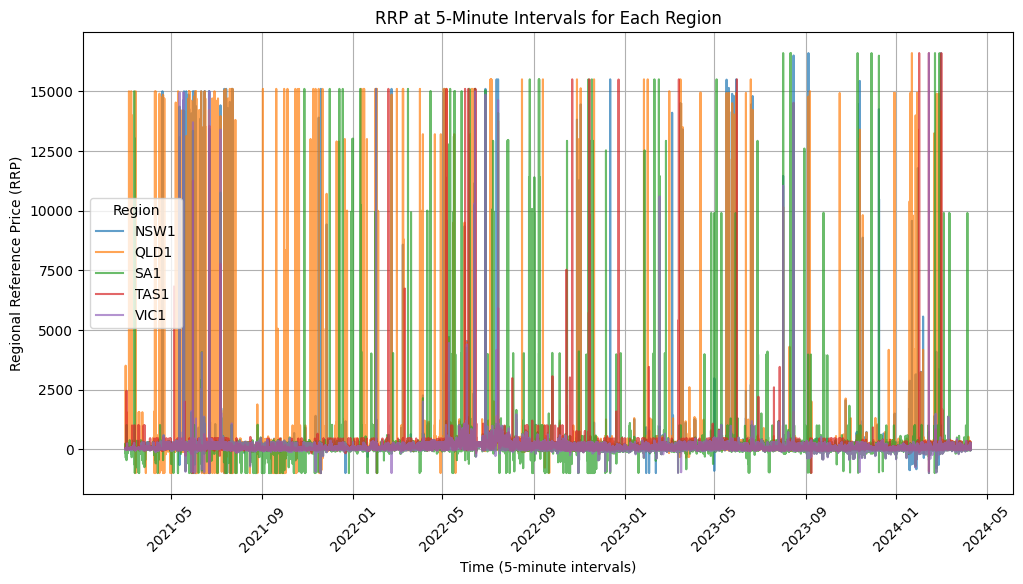

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert SETTLEMENTDATE to datetime
price_data["SETTLEMENTDATE"] = pd.to_datetime(price_data["SETTLEMENTDATE"])

# Set SETTLEMENTDATE as the index for proper time-series plotting
price_data = price_data.sort_values(by=["SETTLEMENTDATE"])

# Get unique regions
regions = price_data["REGIONID"].unique()

# Create a figure
plt.figure(figsize=(12, 6))

# Loop through each region and plot RRP over time
for region in regions:
    subset = price_data[price_data["REGIONID"] == region]  # Filter data for the region
    plt.plot(subset["SETTLEMENTDATE"], subset["RRP"], label=region, alpha=0.7)

# Formatting the plot
plt.xlabel("Time (5-minute intervals)")
plt.ylabel("Regional Reference Price (RRP)")
plt.title("RRP at 5-Minute Intervals for Each Region")
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

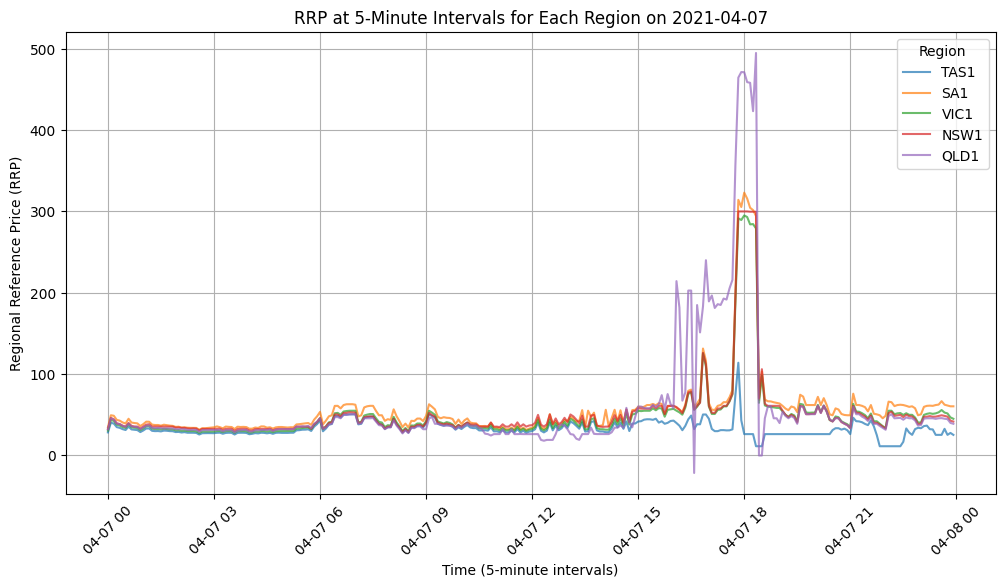

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (Uncomment and replace 'your_file.csv' if needed)
# price_data = pd.read_csv("your_file.csv")

# Ensure SETTLEMENTDATE is in datetime format
price_data["SETTLEMENTDATE"] = pd.to_datetime(price_data["SETTLEMENTDATE"])

# Select a single day's data (Example: the first available date in the dataset)
# selected_date = price_data["SETTLEMENTDATE"].dt.date.min()
selected_date = pd.to_datetime("2021-04-07").date()  # Example: Replace with desired date

# Filter data for the selected day
daily_data = price_data[price_data["SETTLEMENTDATE"].dt.date == selected_date]

# Sort values by time for proper plotting
daily_data = daily_data.sort_values(by=["SETTLEMENTDATE"])

# Get unique regions
regions = daily_data["REGIONID"].unique()

# Create a figure for plotting
plt.figure(figsize=(12, 6))

# Loop through each region and plot RRP over time for the selected day
for region in regions:
    subset = daily_data[daily_data["REGIONID"] == region]  # Filter data for the region
    plt.plot(subset["SETTLEMENTDATE"], subset["RRP"], label=region, alpha=0.7)

# Formatting the plot
plt.xlabel("Time (5-minute intervals)")
plt.ylabel("Regional Reference Price (RRP)")
plt.title(f"RRP at 5-Minute Intervals for Each Region on {selected_date}")
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

In [97]:
# Convert SETTLEMENTDATE to datetime
price_data["SETTLEMENTDATE"] = pd.to_datetime(price_data["SETTLEMENTDATE"])

# Extract date for grouping by day
price_data["DATE"] = price_data["SETTLEMENTDATE"].dt.date

# Plot RRP across time for each region per day
plt.figure(figsize=(12, 6))

# Get unique regions
regions = price_data["REGIONID"].unique()

for region in regions:
    subset = df[df["Region"] == region]  # Filter by region
    plt.plot(subset["SETTLEMENTDATE"], subset["RRP"], label=region)

plt.xlabel("Settlement Date & Time")
plt.ylabel("Regional Reference Price (RRP)")
plt.title("RRP Across Time for Each Region")
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

NameError: name 'df' is not defined